# Chapter 11: The Price of Anarchy - How Much Does Selfishness Cost?

We previously saw **Braess's Paradox**, where selfish drivers created traffic. But can we measure *exactly* how inefficient selfish behavior is?

## The Metric: Price of Anarchy (PoA)
The Price of Anarchy is a ratio that measures the damage caused by lack of coordination.

$$\text{PoA} = \frac{\text{Cost of Selfish Equilibrium (Nash)}}{\text{Cost of Dictator's Optimum}}$$

* If PoA = 1, selfish people are perfectly efficient (Invisible Hand).
* If PoA = 2, the selfish outcome is twice as bad as the optimal one.

## Pigou's Example
This is the "Hello World" of Selfish Routing.
Imagine 1 unit of traffic wants to go from **Start** to **End**.
* **Route 1 (Top):** Very fast, but gets easily clogged. Cost = $x$ (where $x$ is the % of traffic).
* **Route 2 (Bottom):** Slow but infinite capacity. Cost = $1$ (constant).

**The Selfish Outcome (Nash Equilibrium):**
* Drivers look at Route 1. If $x < 1$, the cost is less than 1.
* Route 2 costs 1.
* Therefore, **everyone** takes Route 1 until the cost reaches 1.
* Result: 100% of drivers take Route 1. Everyone pays **1 hour**. Total Cost = 1.

**The Optimal Outcome:**
* A benevolent dictator would split the traffic to minimize total latency.
* Let's calculate the perfect split with Python.

--- Pigou's Example Results ---
Socially Optimal Traffic on Top Road: 0.49 (50%)
Socially Optimal Cost: 0.75

Selfish Traffic on Top Road: 1.00 (100%)
Selfish Cost: 1.00

Price of Anarchy (PoA): 1.3333 (Exactly 4/3)


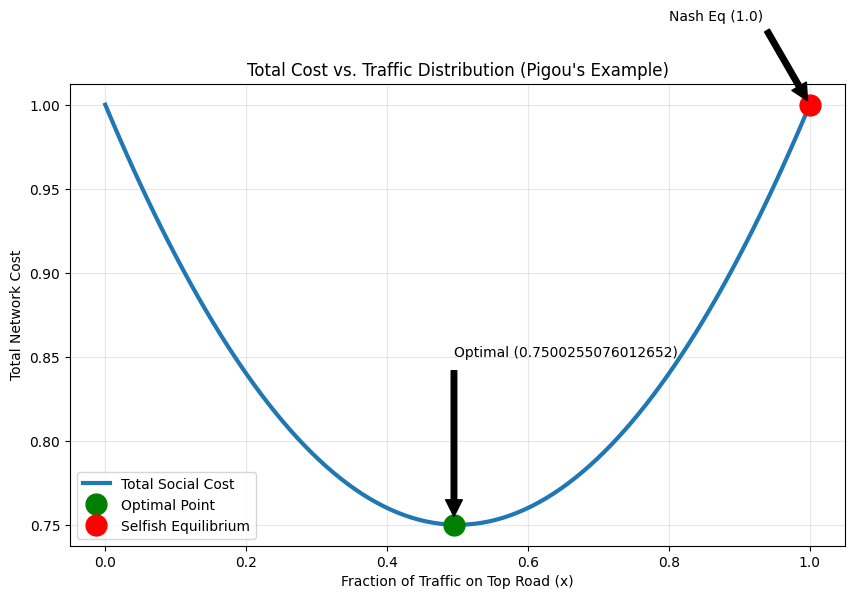

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def solve_pigou_example():
    """
    Simulates Pigou's Example to find the Price of Anarchy.
    Total Traffic = 1.0
    Path 1 Cost: C(x) = x
    Path 2 Cost: C(y) = 1
    """
    
    # 1. DEFINE COST FUNCTIONS
    # Total Cost = (Traffic on 1 * Cost of 1) + (Traffic on 2 * Cost of 2)
    def total_social_cost(x):
        # x is traffic on Path 1
        # (1-x) is traffic on Path 2
        
        time_path_1 = x          # Cost is proportional to load
        time_path_2 = 1.0        # Constant cost
        
        # Total latency experienced by all drivers
        return (x * time_path_1) + ((1 - x) * time_path_2)

    # 2. FIND OPTIMAL SPLIT (Minimizing Total Cost)
    # We check values of x from 0 to 1
    x_values = np.linspace(0, 1, 100)
    costs = [total_social_cost(x) for x in x_values]
    
    min_cost = min(costs)
    optimal_x = x_values[np.argmin(costs)]
    
    # 3. FIND SELFISH SPLIT (Nash Equilibrium)
    # Drivers switch to Path 1 as long as Cost(1) < Cost(2)
    # Cost(1) = x. Cost(2) = 1.
    # Equilibrium happens when x = 1 (or costs equalize).
    # Since max x is 1, and at x=1, Cost(1)=1 which equals Cost(2),
    # the equilibrium is x = 1.
    
    selfish_x = 1.0
    selfish_cost = total_social_cost(selfish_x)
    
    # 4. CALCULATE PRICE OF ANARCHY
    poa = selfish_cost / min_cost
    
    print(f"--- Pigou's Example Results ---")
    print(f"Socially Optimal Traffic on Top Road: {optimal_x:.2f} (50%)")
    print(f"Socially Optimal Cost: {min_cost:.2f}")
    print(f"\nSelfish Traffic on Top Road: {selfish_x:.2f} (100%)")
    print(f"Selfish Cost: {selfish_cost:.2f}")
    print(f"\nPrice of Anarchy (PoA): {poa:.4f} (Exactly 4/3)")

    # 5. VISUALIZATION
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, costs, label='Total Social Cost', linewidth=3)
    
    # Mark Optimal
    plt.plot(optimal_x, min_cost, 'go', markersize=15, label='Optimal Point')
    plt.annotate(f'Optimal ({min_cost})', xy=(optimal_x, min_cost), xytext=(optimal_x, min_cost+0.1),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
    # Mark Selfish
    plt.plot(selfish_x, selfish_cost, 'ro', markersize=15, label='Selfish Equilibrium')
    plt.annotate(f'Nash Eq ({selfish_cost})', xy=(selfish_x, selfish_cost), xytext=(selfish_x-0.2, selfish_cost+0.05),
                 arrowprops=dict(facecolor='black', shrink=0.05))

    plt.title("Total Cost vs. Traffic Distribution (Pigou's Example)")
    plt.xlabel("Fraction of Traffic on Top Road (x)")
    plt.ylabel("Total Network Cost")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

solve_pigou_example()

### Analysis: The Magic Number 4/3

The simulation reveals a specific number: **1.333... or 4/3**.

* **Optimal:** Drivers should split 50/50. Half take the fast road (cost 0.5), half take the slow road (cost 1). Average = 0.75.
* **Selfish:** Everyone takes the "fast" road. But because 100% of people take it, it slows down to cost 1. Average = 1.

$$\text{PoA} = \frac{1}{0.75} = \frac{4}{3}$$

**The Theorem:**
In this chapter's lecture notes, we prove that for *any* network with linear latency functions (like $ax + b$), the Price of Anarchy is **never worse than 4/3**.

This is good news! It means that in simple networks, selfish behavior is "good enough." We only lose about 33% efficiency compared to a central dictator.